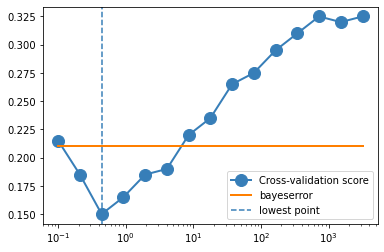

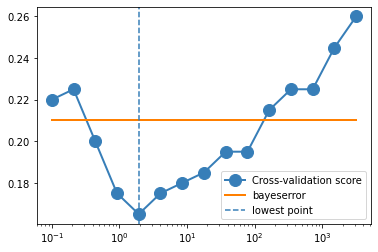

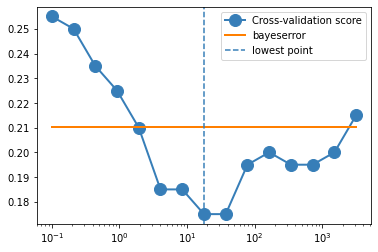

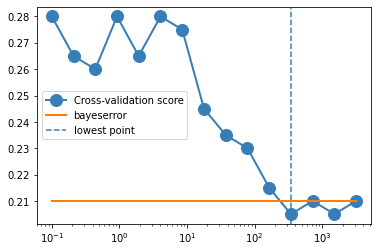

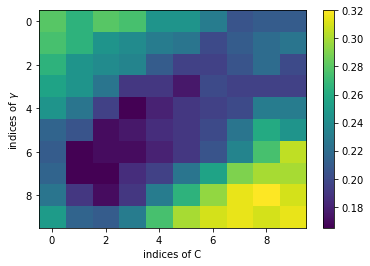

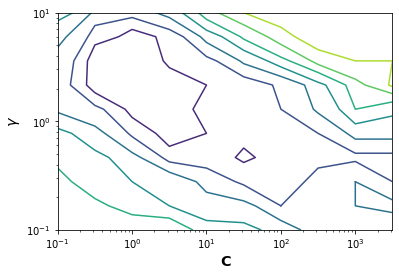

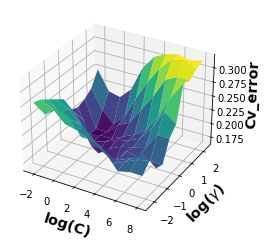

In [3]:
# import superimport

import numpy as np
from scipy.io import loadmat
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, zero_one_loss
import matplotlib.pyplot as plt
from cycler import cycler
# import pyprobml_utils as pml
import requests
from io import BytesIO

# Using Colorblind friendly colors

CB_color = ['#377eb8', '#ff7f00']

cb_cycler = (cycler(linestyle=['-', '--', '-.']) * cycler(color=CB_color))
plt.rc('axes', prop_cycle=cb_cycler)

# -------------------------------------------
# loading data

url = 'C:/Users/Jake luo/17_Kernel/hastieMixture.mat'
# response = requests.get(url)
# rawdata = BytesIO(response.content)
# data = loadmat(rawdata)
data = loadmat(url)

X = data['ans'][0][0][0]
y = data['ans'][0][0][1].astype('int32')
bayeserror = data['ans'][0][0][8]
np.random.seed(0)
perm = np.random.permutation(X.shape[0])
X = X[perm, :]
y = y[perm, :]
y = 2 * y - 1
gammas = [5, 1, 0.5, 0.1]
Crange = np.logspace(-1, 3.5, 15)

# -------------------------------------------
# using 0-1 loss scorer for CV.

scorer = make_scorer(zero_one_loss)

# -------------------------------------------
# Plot 1D CV Slices

for g in gammas:
    plt.figure()
    cross_validation_means = np.array(
        ([cross_val_score(SVC(kernel='rbf', gamma=g, C=c), X, y.ravel(), cv=5, scoring=scorer).mean() for c in Crange]))
    plt.semilogx(Crange, cross_validation_means, label="Cross-validation score", lw=2, marker='o', markersize=12)
    plt.semilogx(Crange, np.repeat(bayeserror, len(Crange)), label='bayeserror', lw=2)
    plt.axvline(Crange[np.argmin(cross_validation_means)], label='lowest point', ls='--')
    plt.legend(loc="best")
#     pml.savefig(f'svmCvGamma{int(10*g)}.pdf')
    plt.show()

# -------------------------------------------
# Plot 2D Heatmap

Crange = np.logspace(-1, 3.5, 10)
gammas = np.logspace(-1, 1, 10)

cross_validation_means = []
for g in gammas:
    cross_validation_means.append(np.array(([
        cross_val_score(SVC(kernel='rbf', gamma=g, C=c), X, y.ravel(), cv=5, scoring=scorer).mean() for c in Crange])))

cross_validation_means = np.array(cross_validation_means)
plt.figure()
pos = plt.imshow(cross_validation_means, interpolation='nearest', aspect='auto', cmap=plt.get_cmap('viridis'))
plt.colorbar()
plt.xlabel('indices of C')
plt.ylabel('indices of ' + r"$\gamma$")
# pml.savefig('svmCvHeatmap.pdf')
plt.show()

# -------------------------------------------
# Plot 2D contour

nc = Crange.shape[0]
ng = gammas.shape[0]
xx, yy = np.meshgrid(Crange, gammas)
plt.figure()
plt.xscale("log")
plt.yscale("log")
plt.xlabel('C', weight='bold', size='x-large')
plt.ylabel(r"$\gamma$", weight='bold', size='x-large')
plt.contour(xx, yy, cross_validation_means, cmap=plt.get_cmap('viridis'))
# pml.savefig('svmCvContour.pdf')
plt.show()

# -------------------------------------------
# Plot 2D surface

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(np.log(xx), np.log(yy), cross_validation_means, cmap=plt.get_cmap('viridis'))
ax.set_xlabel('log(C)', weight='bold', size='x-large')
ax.set_ylabel('log(' + r"$\gamma$" + ')', weight='bold', size='x-large')
ax.set_zlabel('Cv_error', weight='bold', size='x-large')
# pml.savefig('svmCvSurf.pdf')
plt.show()
